# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals_smartcab as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

# **Answer:**

* The smartcab (white car) does not move -- it is stationary (idling) throughout the simulation.
* Traffic light:
    + When Red, a positive reward (+1.91 to +2.81) is recieved for idling at an intersection. The cab should not and does not move.
    + When Green, and no Oncoming traffic, the cab receives a negative reward (-4.43 to -5.81 ) for (stationary/idling).
    + When Green + Oncoming traffic: a positive reward of 0.51 to +1.38 is recieved.
    
Excerpted output from output text file:

Agent idled at a green light with no oncoming traffic. (rewarded -5.27)

Agent idled at a green light with oncoming traffic. (rewarded 1.38)

Agent idled at a green light with no oncoming traffic. (rewarded -4.43)

Agent idled at a green light with no oncoming traffic. (rewarded -5.17)

Agent idled at a green light with no oncoming traffic. (rewarded -5.40)

Agent properly idled at a red light. (rewarded 2.24)

Agent properly idled at a red light. (rewarded 2.82)

Agent properly idled at a red light. (rewarded 2.01)

Agent idled at a green light with no oncoming traffic. (rewarded -5.83)

Agent idled at a green light with oncoming traffic. (rewarded 1.31)

Agent properly idled at a red light. (rewarded 1.91)

Agent properly idled at a red light. (rewarded 2.76)

Agent idled at a green light with oncoming traffic. (rewarded 0.51)



### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

* **agent.py** - four important flags (added an additional flag to the discussion below because of its relevance):

    1. learning (data type = bool): True = will perform Q-Learning; False = will choose random actions
    
    2. epsilon (data type =float): Random exploration factor. Determines the level of random discovery actions. 
    
        * The greedy Q algorithm used for the agent in the smartcab project seems similar to that used in DeepMind's paper on Deep Q-Learning for Atari video games (http://www.nature.com/nature/journal/v518/n7540/full/nature14236.html). As indicated in https://stats.stackexchange.com/questions/270618/why-does-q-learning-use-epsilon-greedy-during-testing, there they use an epsilon-greedy method for exploration during training. This means that when an action is selected in training, it is either chosen as the action with the highest q-value, or a random action. Choosing between these two is random and based on the value of epsilon, and epsilon is annealed during training such that initially, lots of random actions are taken (exploration), but as training progresses, lots of actions with the maximum q-values are taken (exploitation).Then, during testing, they also use this epsilon-greedy method, but with epsilon at a very low value, such that there is a strong bias towards exploitation over exploration, favouring choosing the action with the highest q-value over a random action. However, random actions are still sometimes chosen (5 % of the time).
        
        * Implications of values of epsilon during training:

         - very low value - previous learnings are not used (emphasis on exploitation or learned values in the Q table,
         compared to exploration. Typically useful during testing).
         - a moderate value such as 0.5 leads to using an average of previous learnings and new learnings
          (balance of exploration and expoitation)
         - a value in between moderate and very high, will leverage both previous learnings and risk-taking
           (leaning more towards exploration than exploitation)
         - a very high value will inhibit implementation of learnings, causing unnecessary risk taking 
           (emphasis on exploration). 

    3. alpha (data type = float): Learning rate or factor; 
    defines how much of previous learnings are iterated on by new learnings. 
    
       * Implications of values of alpha: The learning rate or step size determines to what extent the newly acquired information will override the old information. A factor of 0 will make the agent not learn anything, while a factor of 1 would make the agent consider only the most recent information. In fully deterministic environments, a learning rate of is optimal. When the problem is stochastic, the algorithm still converges under some technical conditions on the learning rate that require it to decrease to zero. In practice, often a constant learning rate is used, such as alpha= 0.1 https://en.wikipedia.org/wiki/Q-learning 
    
         - alpha = 0, means that the agent will not change learning behavior. 
         - alpha = 1 means 'full learning', previous learnings are not carried forward, and 'forgotten'.
         - intermediate values between 0 and 1 would use average of previous and new learning.
    
    4. enforce_deadline (data type = bool): 
         - with this flag set to 'True', the agent is evaluated on a deadline goal, and
         - reliability to reach the goal within a given time can be evaluated. 
        
* environment.py: The 'act()' function is the Environment class function that is called when an agent performs an action if it is legal. The function enables rewards for the agent based on traffic laws and oncoming traffic.


* simulator.py: rendering functions, render_text() and render(). Both output the current state of the simulation, at each step in the simulation. render_text() is used for command-line applications and outputs the result to the command line window. render() is GUI rendering based on pygame.

* planner.py: The 'next_waypoint()' function will consider the East-West direction first and then the North-South direction.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


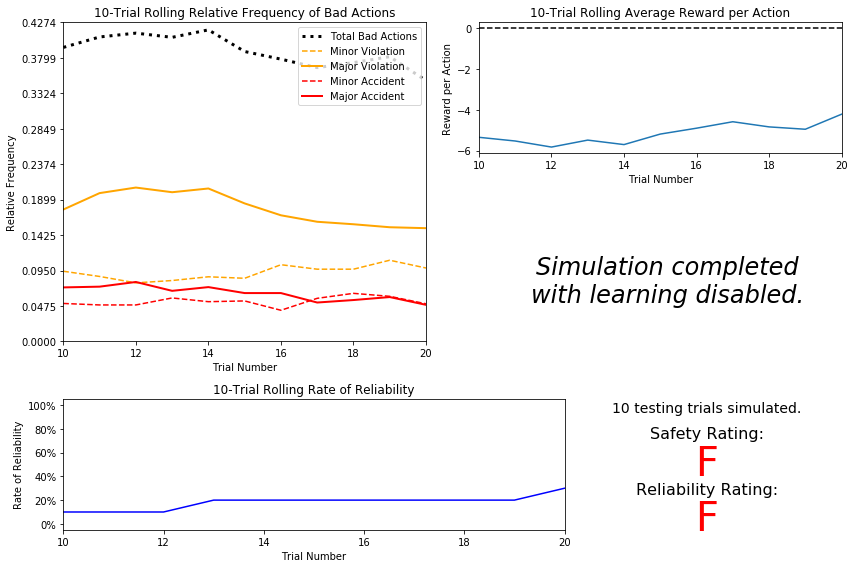

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- *About 40% of the time the driving agent is making bad decisions. About 30% (=(7% + 5%)/40%) of those bad decisions cause accidents (minor and major).*
- *Given that the agent is driving randomly, the very low rate of reliability ranging from 10% to 30% is not unreasonable. The agent is not learning so  the low rate of reliabilty generally makes sense.*
- *The agent is receiving negative rewards (penalties) in the range -4.5 to -5.5 for its actions. Yes, these large negative  rewards suggest the agent has been penalized heavily.*
- *As the number of trials increase, the outcome of results do not appear to change significantly for this no learning scenario.*

* This Smartcab would not be considered safe (accident with 30% frequency and overall about 40%  of bad actions),  and would not be considered reliable for its passengers because it's reliability for reaching the destination on time is 10%-30%, which is quite low.*


## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

Features available to the agent that are most relevant for learning both safety and efficiency are as follows:

* Safety: **Light color** - Compliance with traffic light rules in the navigation grid is very important to safety. It is mentioned that there are about 100 smartcabs navigating in the same environment. As such, the smartcab agent algorithm, which defines rules for specific combinations of traffic light status (red or green) and **oncoming traffic status** (for green light, oncoming or no oncoming traffic) is critical for safe travels. The smartcab is expected to stop/idle at a red light. With this compliance the smartcab agent earns a positive reward; and is penalized (negative reward) for red light violation. At an intersection with green light the oncoming traffic and direction of turn (left or right) determine whether it's safe to proceed, otherwise a collision might result. For a left turn the smartcab needs to proceed cautiously as it does not have the right of way.


* Efficiency: for the smartcab, the knowledge of the **waypoint** and **light state** are most needed for achieving efficiency. It ensures the smartcab can reach the destination in an efficient manner. This capability requires setting **enforce deadline** to True. 

The 'enforce deadline' flag is useful for the smartcab agent to reach the destination reliably within shortest amount of time. The state space exploration (discovery) rate **epsilon**, and its decay over time, are parameters that can used to improve reliability. There are no rewards for reaching the goal early. Rewards for available to the smartcab only for obeying traffic rules. We opt not need to include **Deadline** as an input as this would significantly increase the number of states we need to train on.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

There are 384 (=3x2x4x4x4) states obtained by multiplying the number of choices in each of the following features below: 

- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading. - (left, right, forward) --> 3
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light. - (red, green) --> 2
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present. - (None, left, right, forward) --> 4
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present. - (None, left, right, forward) --> 4
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present. - (None, left, right, forward) --> 4

The number of states (384) seems to be large but I think it is not too large for safe and reliable trips to the destinations by the driving agent. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

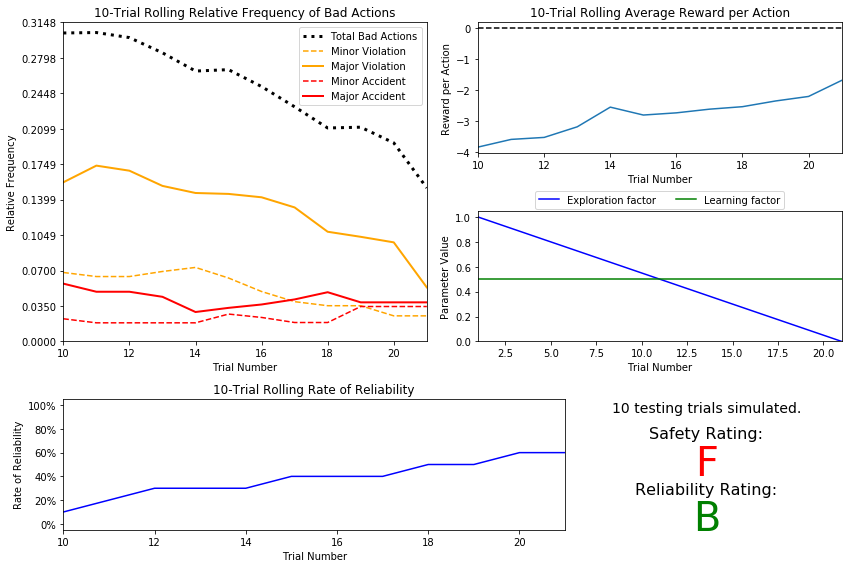

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')


**Sensitivity studies have been executed below for default simulation, by using different linear decay rates for 'epsilon', the exploration factor and dropping features from inputs, such as input-left or input-right. These are as listed below along with the sensitivity results (safety, reliability):**

* Sensitivity Study # 1 for default Q-Learning simulation: epsilon modeled as linear decay with slope=-0.05, and removed inputs('right') from state tuple. Results--> Safety= F , Reliability = F 
 (file: sim_default-learning_epsilon_linear_decay_slope=-0.05_no-inputs-right.csv)


* Sensitivity Study # 2 for default Q-Learning simulation: epsilon modeled as linear decay with slope=-0.05, and removed inputs('left') from state tuple. Results--> Safety= F , Reliability = C. 
 Conclusion: Improved Reliability. (file: sim_default-learning_epsilon_linear_decay_slope=-0.05_no_inputs_left.csv)


* Sensitivity Study # 3 for default Q-Learning simulation: epsilon modeled as linear decay with slope=-0.003 (slower linear decay). Results--> Safety = F , Reliability = D. 
 Conclusion: Reliability improved somewhat. (file: sim_default-learning_epsilon_linear_decay_slope=-0.003.csv)


* Sensitivity Study # 4 for default Q-Learning simulation: epsilon modeled as linear decay with slope=-0.003 (slower linear decay), and removed inputs('left') from state tuple. Results--> Safety = D, Reliability = A. Safety improved a bit, Conclusion: Reliability improved significantly. 
 (file: sim_default-learning_epsilon_linear_decay_slope=-0.003_no_inputs_left.csv)


* Sensitivity Study # 5 for default Q-Learning simulation: epsilon modeled as linear decay with slope=-0.001 (slowest linear decay). Results-->Safety = A+, Reliability = A+. 
 Conclusion: Both Safety and Reliability scores are excellent.
 (file: sim_default-learning_epsilon_linear_decay_slope=-0.001.csv)

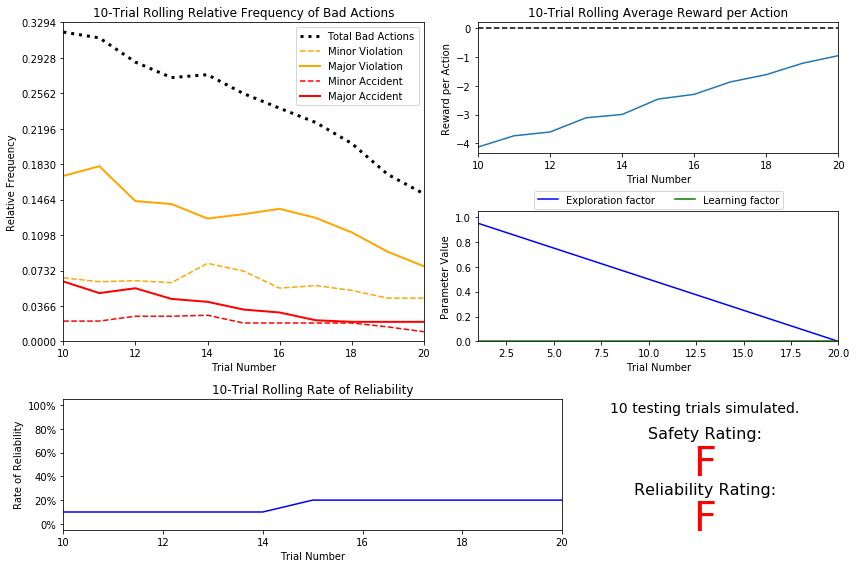

In [13]:
# Sensitivity Study # 1 for default simulation
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning_epsilon_linear_decay_slope=-0.05_no-inputs-right.csv')

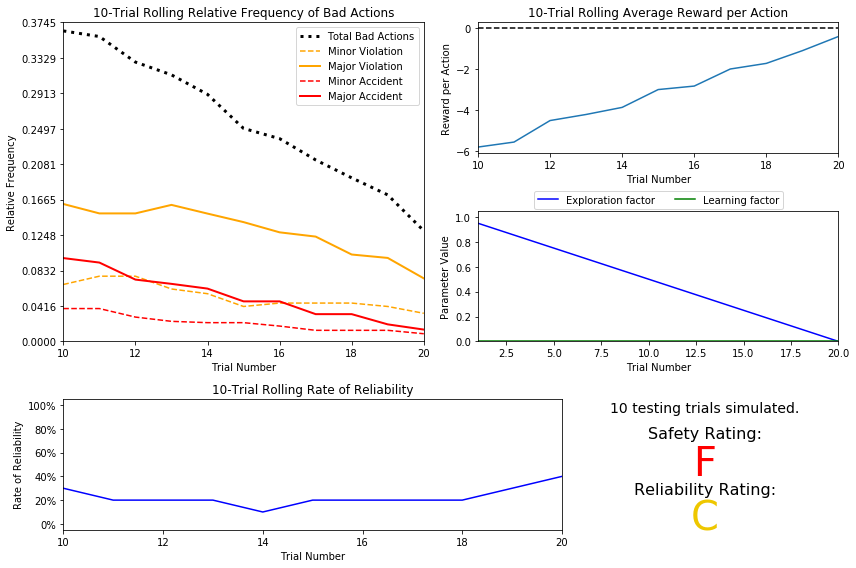

In [14]:
# Sensitivity study # 2: dropped inputs(left) from state tuple
# Load the 'sim_default-learning' file from the default Q-Learning simulation sensitivity study results.
vs.plot_trials('sim_default-learning_epsilon_linear_decay_slope=-0.05_no_inputs_left.csv')

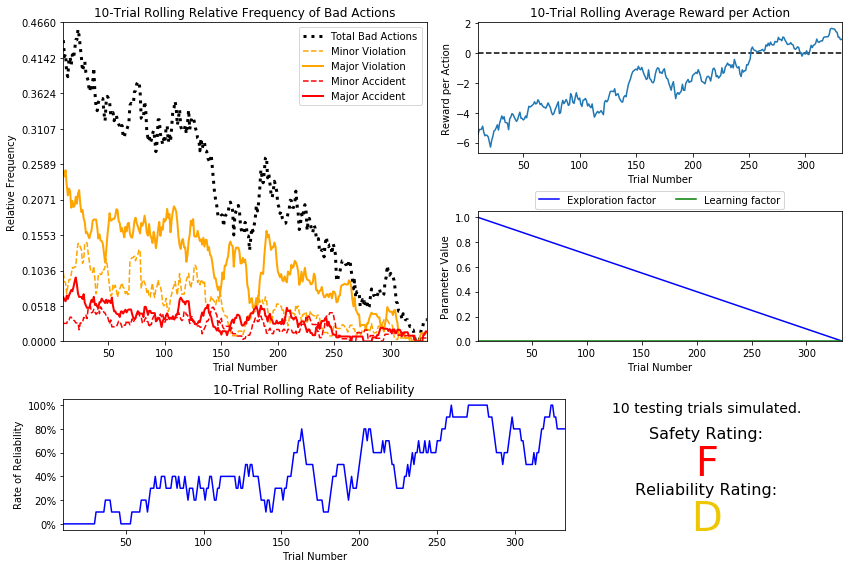

In [15]:
# Sensitivity Study # 3
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning_epsilon_linear_decay_slope=-0.003.csv')

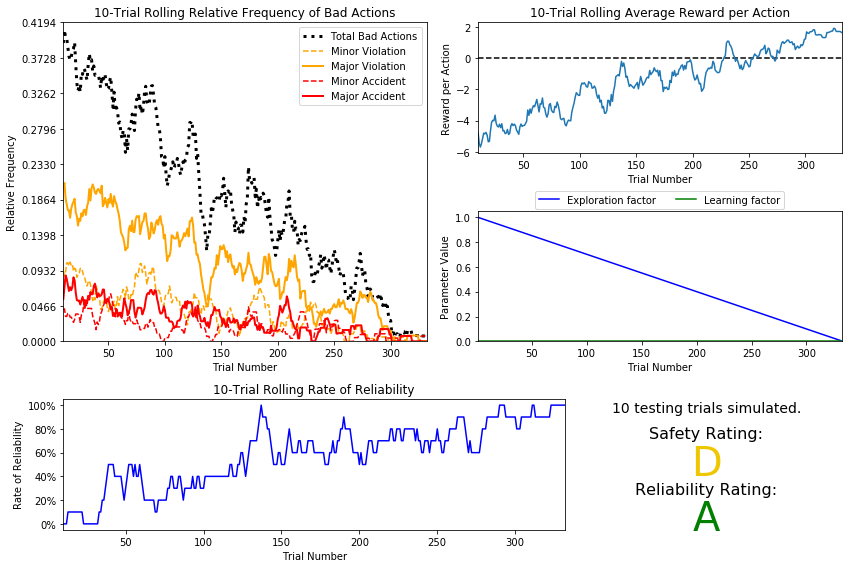

In [16]:
# Sensitivity study 4: dropped inputs(left) from state tuple
# Load the 'sim_default-learning' file from the default Q-Learning simulation sensitivity study results.
vs.plot_trials('sim_default-learning_epsilon_linear_decay_slope=-0.003_no_inputs_left.csv')

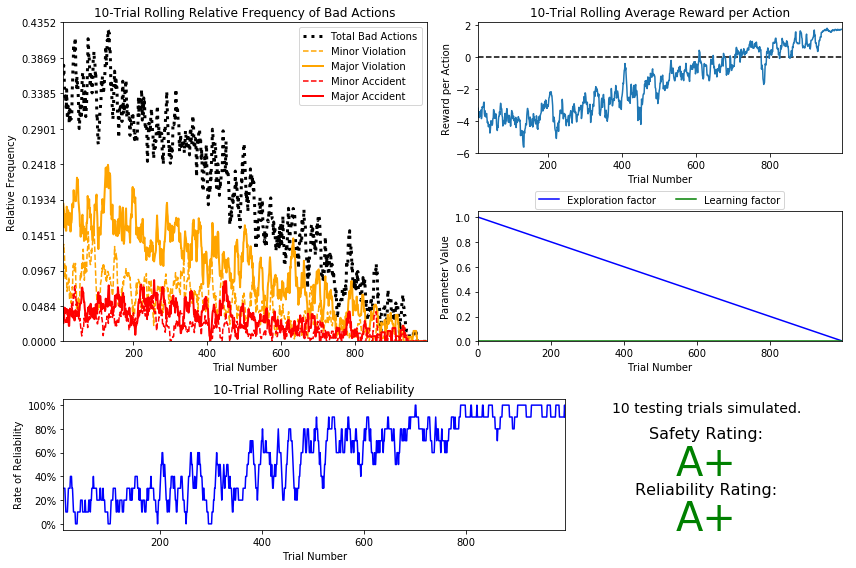

In [17]:
# Sensitivity Study #5, linear decay slope = - 0.001 
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning_epsilon_linear_decay_slope=-0.001.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?* 

Answer: Both the basic driving agent and the default Q-learning agent used a linearly decaying epsilon with a slope of -0.05. Both of these agents yielded F for safety. While the basic driving agent yielded F for reliability, the default Q-learning agent performed morereliably with areliability score of B. However the default Q-learning agent performance indicates somewhat better metrics at the end of 20 trials, such as:

        - Overall, bad actions have dropped by ~35% to ~17.5%
        - Major Accidents have dropped from ~5% to ~4%
        - Minor Accidents have dropped from ~5% to ~3.8%
        - Major Violations have dropped from ~15.5% to ~5.5%
        - Minor Violations have dropped from ~5% to ~2.5%
        
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*

     - Answer: 20 trials were needed prior to testing. This is consistent with the fact that epsilon is modeled as a  linearly decaying function with slope=-0.05. This trend is displayed in the Parameter Value graph.
     

- *Is the decaying function you implemented for epsilon (the exploration factor) accurately represented in the parameters panel?* 

     - Answer: Yes, the linearly decaying function can be seen in the parameters panel.
     
        
* As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?

     - Answer: Yes to both the questions as seen in the display plots.
    

- *How does the safety and reliability rating compare to the initial driving agent?*

     - Answer: Both the initial (Basic) agent and the default Q-learning agent yielded : Safety = F, Reliability = F

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

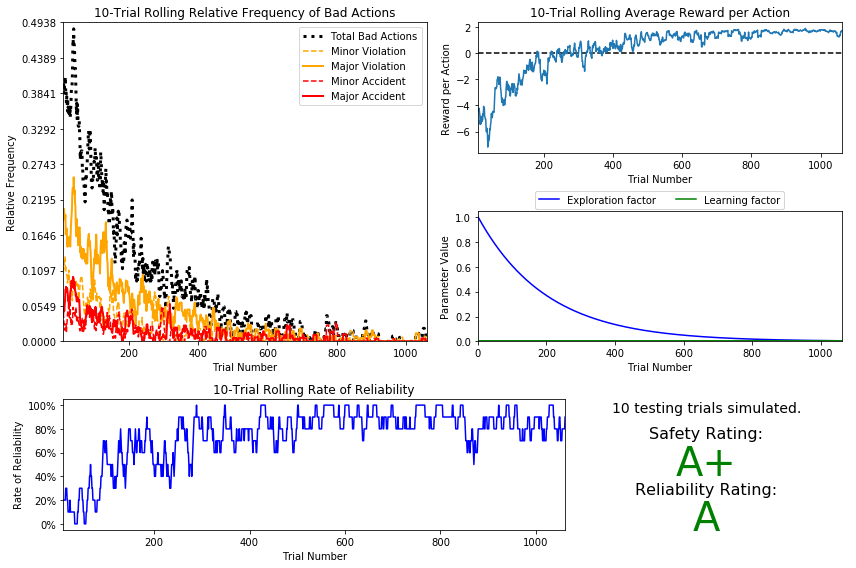

In [18]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# epsilon = exp(-alpha*t), alpha=0.005
vs.plot_trials('sim_improved-learning.csv')

## Sensitivity Studies: Improved Learning

Plots for the following sensitivity studies are shown below.

* Sensitivity Study 6: Exponential decay for epsilon = exp(-alpha.t), with learning rate alpha increased to 0.01
 
 Safety rating = F, Reliability Rating = F. Conclusion: Failing ratings
 (file: sim_improved-learning_alpha0.01.csv)
 

* Sensitivity Study 7: Exponential decay for epsilon = exp(-alpha.t), with learning rate alpha decreased to 0.001
 
 Safety rating = A+, Reliability Rating = A+. Conclusion: Perfect reatings
 (file: sim_improved-learning_alpha0.001.csv)

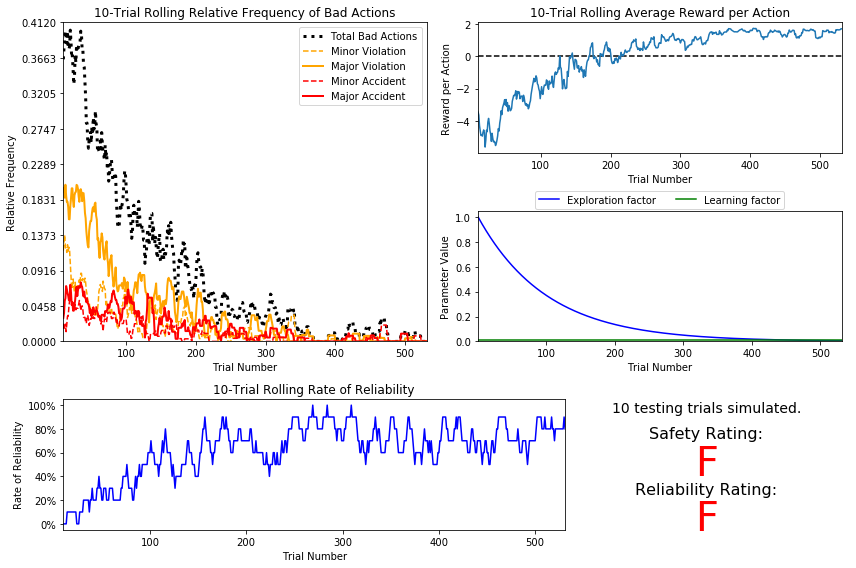

In [5]:
# Sensitivity Study 6. Exponential decay for epsilon = exp(-alpha*t), with alpha=0.01
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_alpha0.01.csv')

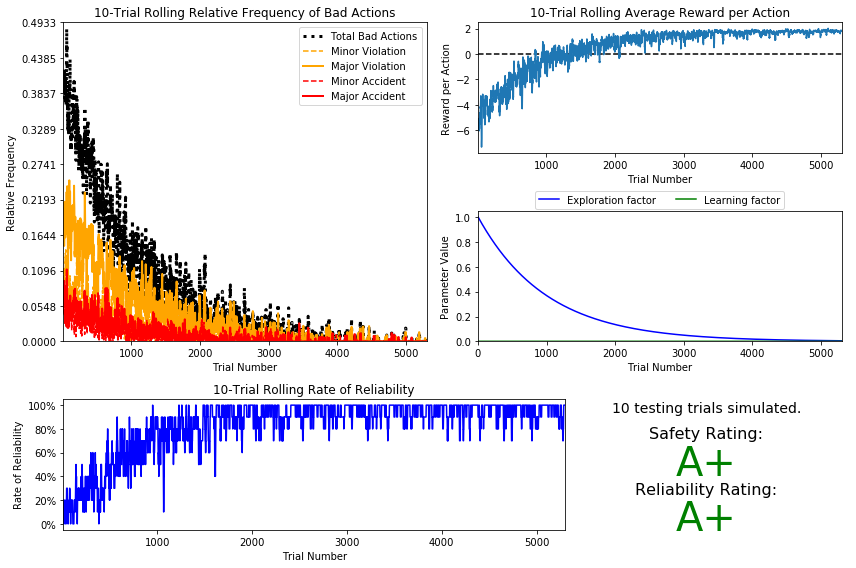

In [4]:
# Sensitivity Study 7. Exponential decay for epsilon = exp(-alpha*t), with alpha=0.001
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_alpha0.001.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

* What decaying function was used for epsilon (the exploration factor)?

  - Answer: Exponential decay --> epsilon = exp(-alpha*t)
  

* Approximately how many training trials were needed for your agent before beginning testing?

  - Answer: About 1000+ training trials were needed for the exponential decay model for epsilon, with alpha=0.005; and about 5000+ training trials were needed for the exponential decay model for epsilon with alpha=0.001. 
  

* What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?

    - Answer: epsilon tolerence = 0.005, alpha(learning rate) = 0.005 was used (resulted in Safety rating = A+ and
  ReliabilityRating A+); sensitivity studies were performed for epsilon with exponential decay model using higher
  alpha = 0.01 (yielded unacceptable safety and reliability ratings of F), and lower alpha = 0.001 (yielded A+ rating for
  both safety and reliabilty).
  

* How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?

    - Answer: The default Q-Learner with linear decay for epsilon (ϵt+1=ϵt−0.05,for trial number t) resulted in failing
    ratings of F for both safety and reliability. This Q learner with exponenial decay for epsilon = exp(-alpha.t),
    alpha = 0.005, yielded A+ ratings for both safety and reliability.


* Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?

     - Answer: Based on the results and plots presented above for the improved learning cases, it appears that the
     driving agent is capable of, and has learned an appropriate policy.
    

* Are you satisfied with the safety and reliability ratings of the Smartcab?

    - Answer: Yes, I am satisfied with the safety and reliability ratings (both A+) of the driving agent for 
    epsilon = exp(-alpha.t), alpha = 0.005, with the rating definitions provided in visual_smartcab.py.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

In the agent python file the state tuple is defined as:

    state = (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])


**Based on US traffic laws/rules, the itemized list (1, 2, 3) below indicates some basic rules that can be a part of a realistic optimal policy:**

    1. When light='red',and waypoint not'right',  choose 'None' (stay stationary).
    
    Example 1:from log sim_improved-learning_alpha0.005.txt file we see None(stationary) is rewarded (0.27) correctly:
    
    (waypoint='left', light='red', left='forward', right='forward', oncoming= 'None')
         -- forward : -0.59
         -- right : -0.30
         -- None : 0.27 <--
         -- left : -0.79
         

     2. If lights='red' and waypoint='right' (Example 2A) or when light='green' (Example 2B), move in the direction of the
    'waypoint' if there is no chance of collision (this means when turning 'right' and left traffic is not 'forwards')
    
    Example 2A:from log sim_improved-learning.txt file we see the agent is at a red light, waypoint is to the
    right, traffic from left is 'right', and no traffic from right and no oncoming traffic. We see from results below that
    moving to the right is correctly rewarded (0.33), and moving to the 'left' or 'forward' are correctly penalized -0.10
    and -0.16, respectively.
       
       (waypoint= 'right', light='red', left='right', right=None, oncoming=None)
       
         -- forward : -0.16
         -- right : 0.33 <--
         -- None : 0.02
         -- left : -0.10


    Example 2B: If the agent is at a green light, and the waypoint is to the right with no traffic from the left, 
    and no oncoming traffic, traffic from rightis moving right, then the agent can turn right safely. 
    
    From the log file "sim_improved-learning.txt", we see the agent is at a green light, 
    waypoint is to the right, traffic from left is 'right', and no traffic from right and no oncoming traffic.
    We see from results below that moving to the right is correctly rewarded (0.28).
    
        (waypoint = 'right', light='green', left=None, right='right', oncoming=None)

         -- forward : 0.01
         -- right : 0.28 <--
         -- None : -0.05
         -- left : 0.01

  
    3. Example 3: From the log file "sim_improved-learning.txt" we see the agent is at a green light, waypoint is forward,
    no traffic from left, traffic from right are moving right and no oncoming traffic. We see from results below that 
    moving forward is correctly rewarded (0.80).

        (waypoint='forward', light='green', left=None, right='none', oncoming=None)

         -- forward : 0.80 <--
         -- right : 0.00
         -- None : 0.00
         -- left : 0.00
    
**Examples of Suboptimal Policies (Examples 4, 5 below) that the driving agent learned during the improved simulation. These suboptimal policies can adversely affect performance of the driving agent in terms of reaching destinations in less time.** 

    4. Example 4: Agent policy is sub optimal because turning left towards the waypoint is rewarded less 
     than turning away to the right.
     
    
    (waypoint='left', light='green', left='forward', right=None, oncoming=None)
    
     -- forward : 0.02
     -- right : 0.36 
     -- None : -0.35 <---
     -- left : 0.06 
    
    

    5. Example 5: This policy is suboptimal because the reward for going forward towards the waypoint on green light
    should be rewarded higher than going left (reward=0.08 vs. 0.40); also the large penalty of -0.21 for remaining
    stationary seems inappropriate.


    (waypoint='forward', light='green', left='left', right=None, oncoming=None)
    
     -- forward : 0.08<---
     -- right : 0.04
     -- None : -0.21
     -- left : 0.40 <--- 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm:

1.  Environment Related Characteristics:

       * All possible states from the starting point to the destination are not known a priori for a given trip.
       Only the next step (Waypoint) is known. States at route intersections will keep changing. Hence future rewards
       associated with unknown states cannot be determined unless states are known. Perhaps use of the greedy algorithm
       biases the learning based on current rewards. Perhaps probabilities could be assigned to actions in future states as
       a recourse to determine future rewards.
       
2. Smartcab Related Characteristics:

      * For this project the route depends on the starting point in the grid and the destination, and this can be different
      for each trip. Additionally, there are about 100 cabs moving in the grid and their density near a waypoint cannot be
      predicted. This may affect evaluation of delayed rewards. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.